In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib.pyplot as plt

# Computational Physics 2 Laboratory

## Chapter 1. Introduction to the family of MC methods

Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. This is simply a paragraph I pulled off the Wikipedia to make the notebook less abrupt. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.

### Topic 1. Pi estimation

In [2]:
def pi_est(N0: int, style: str):
    '''
        Estimation of the Pi constant π = 3.1415926535...
        
        Args:
            N0: number of sample points
            style: could be 'hm' or 'sp'
            
        Return:
            Pi estimation
    '''
    xrand = np.random.uniform(0, 1, N0)
    yrand = np.random.uniform(0, 1, N0)
    if style == 'hm':
        hit = 0
        for i in range(N0):
            if (xrand[i]**2+yrand[i]**2) < 1:
                hit += 1
                
        return (hit/N0)*4
    
    if style == 'sp':
        f_mean = np.mean([np.sqrt(1-x**2) for x in xrand])
        
        return f_mean*4

In [3]:
my_pi_1 = pi_est(N0=100000, style='hm')
my_pi_2 = pi_est(N0=100000, style='sp')

my_pi_1, my_pi_2

(3.14432, 3.139536036315984)

### Topic 2. Simulation of nuclear decay

In [4]:
def decay_func(N0: int, T: float, t: float):
    '''
        Nuclear decay function
    '''
    p = np.log(2)/T
    
    return N0*np.exp(-p*t)

In [5]:
def decay_mc(N0: int, T: float, multiplier: int):
    '''
        Simulating the decay process (1 mother, 1 daughter)
        
        Args:
            N0 - Initial population
            T - decay period
            
        Returns:
            Survival population
    '''
    p = np.log(2)/T # decay probability
    N = [True for i in range(N0)]
    
    T_end = multiplier*T
    time_simulation = np.arange(1, T_end, 1)
    
    survival_pop = []
    for t in time_simulation:
        r = np.random.uniform(0, 1, N0)
        N = N&(r>p)
        survival_pop.append(sum(N))
    
    return time_simulation, survival_pop

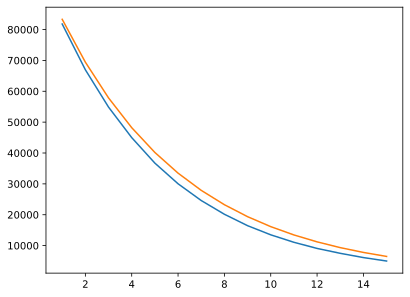

In [6]:
time_simulation, survival_pop = decay_mc(N0=100000, T=3.8, multiplier=4)

plt.plot(time_simulation, survival_pop,  )
plt.plot(time_simulation, [decay_func(N0=100000, T=3.8, t=t) for t in time_simulation])

Let us prove that the process of nuclear decay obeys the homogeneous Poisson distribution. The following proof is not concrete, but let us give it a try.

A discrete variable $X$ is said to have a Poisson distribution if its probablity mass distribution obeys 

\begin{align}
\rho(k, \mu) = \dfrac{e^{-\mu}\mu^k}{k!}
\end{align}

In our case, that discrete variable is the *number of decay event* in a unit of time $\Delta t$. Let us suppose initially we have $N_0=100000$ nuclei. First, we simulate the process $10^5$ times.

In [7]:
delta_N = []
T = 3.8*24
p = np.log(2)/T # probability a nucleus decays in 1 day
N0 = int(10**4)
trials = int(10**5)

for i in range(trials):
    r = np.random.uniform(0, 1, N0)
    r = (r <= p) # those unluckily decay
    delta_N.append(sum(r))

In [8]:
delta_N_range = np.arange(min(delta_N), max(delta_N), 1)

In [9]:
def poisson_dist(k, mu):
    rho = (np.exp(-mu)*mu**k)/(np.math.factorial(k))
    return rho

mu = p*N0
rhos = [poisson_dist(k, mu) for k in delta_N_range]

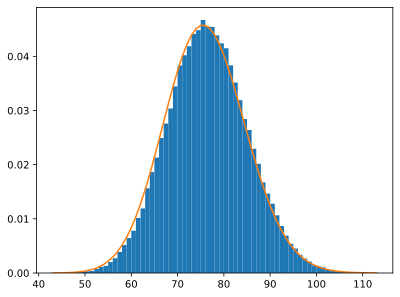

In [10]:
plt.hist(delta_N, bins=delta_N_range, density=True)
plt.plot(delta_N_range, rhos)

### Topic 3: Integration

1-dimensional integration

In [11]:
def f(x):
    return (np.cos(x)/np.sqrt(1+x**4))+0.05

In [12]:
def MCintegral1D(style: str, N: int, xmin, xmax, ymax):
    '''
        Args:
        
        Returns:
    '''
    
    xrand = np.random.uniform(xmin, xmax, N)
    
    if style == 'hm':
        yrand = np.random.uniform(0, ymax, N)
        hit_pos, hit_both = 0, 0
        for n in range(N):
            if 0 < yrand[n] < f(xrand[n]):
                hit_pos += 1
            if 0 < yrand[n] < np.abs(f(xrand[n])):
                hit_both += 1
        int_positive = (hit_pos/N)*ymax*(xmax-xmin)
        int_both = (hit_both/N)*ymax*(xmax-xmin)
        int_negative = int_both - int_positive
        int_final = int_positive - int_negative
        
        return int_final
    
    if style == 'sp':
        fmean = 0
        for x in xrand:
            fmean += f(x)
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)
        
        return int_final

In [13]:
int_result_SM = MCintegral1D(style='sp', N=10000, xmin=2, xmax=10, ymax=1)
int_result_HM = MCintegral1D(style='hm', N=10000, xmin=2, xmax=10, ymax=1)

int_result_SM, int_result_HM

(0.22126764617909409, 0.20799999999999996)

2-dimensional integration

In [14]:
def f(x, y):
    return (y**3*np.exp(y))/(x**2+y**2)

In [15]:
def MCintegral2D(style: str, N: int, xmin, xmax, ymin, ymax, zmax):
    '''
        Args
        Returns
        
    '''
    
    xrand = np.random.uniform(xmin, xmax, N)
    yrand = np.random.uniform(ymin, ymax, N)
    zrand = np.random.uniform(0, zmax, N)
    
    if style == 'sm':
        fmean = 0
        for n in range(N):
            fmean += f(xrand[n], yrand[n])
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)*(ymax-ymin)
    
        return int_final 
    
    if style == 'hm':
        hits = 0
        for n in range(N):
            if zrand[n] < f(xrand[n], yrand[n]):
                hits += 1
            
        int_final = (hits/N)*(xmax-xmin)*(ymax-ymin)*(zmax-0)
        
        return int_final
    
    if style == 'sp':
        fmean = 0
        for n in range(N):
            if (xrand[n]-0.5)**2+yrand[n]**2 - 1 < 0:
                fmean += f(xrand[n], yrand[n])
        fmean = fmean/N
        int_final = fmean*(xmax-xmin)*(ymax-ymin)
        
        return int_final 

In [16]:
int2d_hm = MCintegral2D(style='hm', N=10000, xmin=1, xmax=2, ymin=3, ymax=4, zmax=210)
int2d_sm = MCintegral2D(style='sm', N=10000, xmin=1, xmax=2, ymin=3, ymax=4, zmax=210)
int2d_sp = MCintegral2D(style='sp', N=10000, xmin=-3, xmax=3, ymin=-3, ymax=3, zmax=210)

int2d_hm, int2d_sm, int2d_sp

(106.15499999999999, 104.85443648496224, 0.5751080170966474)

3-dimensional integration

In [17]:
def MCintegral3D(style: str, N: int, xmin, xmax, ymin, ymax, zmin, zmax):
    '''
        Args
        Returns
        
    '''
    
    xrand = np.random.uniform(xmin, xmax, N)
    yrand = np.random.uniform(ymin, ymax, N)
    zrand = np.random.uniform(zmin, zmax, N)
    
    if style == 'sm':
        fmean = 0
        for n in range(N):
            fmean += f(xrand[n], yrand[n], zrand[n])
        int_final = (fmean/N)*(xmax-xmin)*(ymax-ymin)*(zmax-zmin)
        
        return int_final
    
    if style == 'sp':
        fmean = 0
        for n in range(N):
            if (xrand[n]**2+yrand[n]**2 <= 1) and (-1 <= zrand[n] <= 1):
                fmean += f(xrand[n], yrand[n], zrand[n])
        int_final = (fmean/N)*(xmax-xmin)*(ymax-ymin)*(zmax-zmin)
        
        return int_final

In [18]:
def f(x, y, z):
    return 1/np.sqrt(x**2+y**2+(z-2)**2)

int3d_sm = MCintegral3D('sm', 10000, -1, 1, -1.5, 1.5, -1, 1)
int3d_sp = MCintegral3D('sp', 10000, -1, 1, -1.5, 1.5, -1, 1)

int3d_sm, int3d_sp

(5.660370415462413, 3.1688172919879802)

## Chapter 2. Random number generators for Monte-Carlo simulation

### Topic 1. Generating uniformly random numbers using Linear Congruential Generator

A LCG algorithm is characterized completely by three numbers, multiplier $a$, increment $c$, and modulus $m$. To generate, for example, $N$ randomly uniform numbers, we start with a seed $X_0$, and update new random numbers $X_n$ by

\begin{align}
X_{n+1} = (a X_n + c)\ \text{mod}\ m
\end{align}

In [19]:
def LCGinator(a, c, m, N):
    '''
        Args:
            a: multiplier
            c: increment
            m: modulus
            
        Returns:
            
    '''
    
    x = np.zeros(N)
    x[0] = int(N*np.random.uniform(0, 1))
    
    for n in range(1, N):
        x[n] = (a*x[n-1]+c) % m
        
    x = np.array(x)/max(x)
    
    return x

(array([ 994.,  980., 1012., 1039.,  956., 1009.,  996.,  992., 1004.,
        1018.]),
 array([5.23424848e-07, 1.00000471e-01, 2.00000419e-01, 3.00000366e-01,
        4.00000314e-01, 5.00000262e-01, 6.00000209e-01, 7.00000157e-01,
        8.00000105e-01, 9.00000052e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

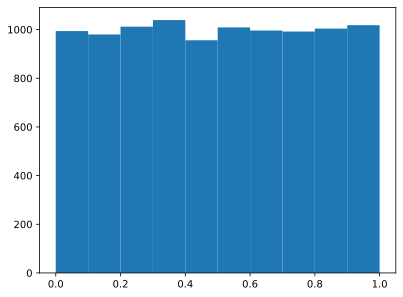

In [20]:
random_number = LCGinator(a=16807, c=0, m=2**31-1, N=10000)

plt.hist(random_number)

### Topic 2. Generating a Gaussian distribution using Box-Muller method

To sample from a distribution, it's common to use the inverse method. However, in order to use the inverse method, we'll have to know a close form expression. For normal distribution, this is hard.

Box-Muller uses two main ingredients: polar coordinate and two uniform distributions from $[0,1]$, let us call them $U_1$ and $U_2$ . The result is going to be two indepedent random variables $G_1, G_2$ normally distributed $N(\mu=0, \sigma=1)$.

The formulas for $G_1, G_2$ are 

\begin{align}
G_1 = \sqrt{-2\log(U_1)}\sin(2\pi U_2)\\
G_2 = \sqrt{-2\log(U_1)}\cos(2\pi U_2)
\end{align}

In [21]:
def boxmuller_inator(N: int, U1, U2):
    '''
        Args:
            N: how many random numbers do you want?
            
        Returns:
        
    '''
    
    G1 = np.zeros(N)
    G2 = np.zeros(N)
    
    for n in range(N):
        G1[n] = np.sqrt(-2*np.log(U1[n]))*np.sin(2*np.pi*U2[n])
        G2[n] = np.sqrt(-2*np.log(U1[n]))*np.cos(2*np.pi*U2[n])
        
    return G1, G2

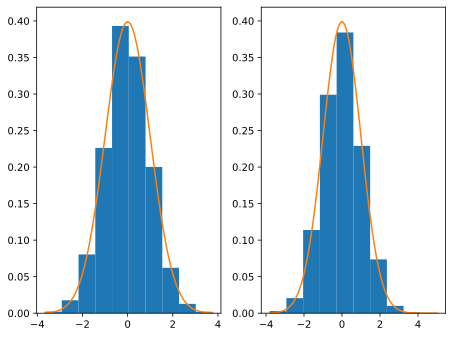

In [22]:
U1, U2 = LCGinator(a=16807, c=0, m=2**31-1, N=10000), LCGinator(a=16807, c=0, m=2**31-1, N=10000)
G1, G2 = boxmuller_inator(N=10000, U1=U1, U2=U2)

range1 = np.linspace(min(G1), max(G1), 100)
range2 = np.linspace(min(G2), max(G2), 100)

def normal_dist(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-(x-mu)**2/2*sigma**2)

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(G1, density=True)
axes[0].plot(range1, [normal_dist(x, 0, 1) for x in range1])
axes[1].hist(G2, density=True)
axes[1].plot(range2, [normal_dist(x, 0, 1) for x in range2])
fig.tight_layout()

### Rejection method 

Sometimes we just desperately want a distribution that suits our purpose. If uniform is not good enough, and Gaussian by no means serves our purpose, then we switch to the rejection method.

Here, let us assume we wish to sample from an ugly function like

\begin{align}
\rho(x) = \dfrac{2}{3}x^{-1/3}
\end{align}

(0.0, 15.0)

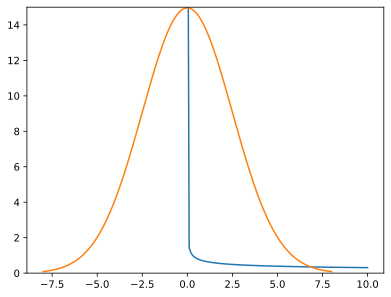

In [23]:
xrange = np.linspace(0.00001, 10, 100)
xnorm = np.linspace(-8, 8, 1000)
norm_dist_sim = np.random.normal(loc=0, scale=0.4)
plt.plot(xrange, [(2/3)*x**(-1/3) for x in xrange])
plt.plot(xnorm, [15*normal_dist(x, 0, 0.4) for x in xnorm])
plt.ylim(0, 15)

one should realize the complication of sampling from such distribution. The function diverges as $x\to 0$, indicating that we need as many points as possible in the vicinity of $x=0^+$. One way to overcome this divergence is to make create a "cut-off" point of the function $\rho$.

In [24]:
def rho(x):
    if x > 0.1:
        return (2/3)*x**(-1/3)
    else:
        return 15

In [27]:
def maxwell_boltzmann(a, v):
    return (np.sqrt(2/np.pi)*v**2)*np.exp(-v**2/(2*a**2))/a**3

Let us now demonstrate the Maxwell-Boltzmann distribution. The probability density function of the MB distribution reads

\begin{align}
\rho_{MB}(v) = \sqrt{\dfrac{2}{\pi}}\dfrac{v^2}{a^3}e^{\dfrac{-v^2}{2a^2}}
\end{align}

In [28]:
def sampler_ginator(a, b, N: int, sample_from: str, Fmax):
    '''
        Args:
            N: 
            U: uniform sampling
            G: Gaussian sampling
            Fmax: the maximum value of the target function rho in the range
        Return:
            
    '''
    
    if sample_from == 'uniform':
        count = 0
        x_rho = [] 
        while count < N:
            xrand = np.random.uniform(a, b, N)
            yrand = np.random.uniform(0, Fmax, N)
            for n in range(N):
                if yrand[n] <= maxwell_boltzmann(a=2, v=xrand[n]):
                    count += 1
                    x_rho.append(xrand[n])
        
        return x_rho

In [29]:
x_rho = sampler_ginator(a=0.00001, b=10, N=100000, sample_from='uniform', Fmax=15)

(array([1.11270635e-03, 4.14736004e-03, 9.71089180e-03, 1.90171631e-02,
        2.70084178e-02, 3.48985174e-02, 4.78463731e-02, 5.65457137e-02,
        7.34386192e-02, 8.37564418e-02, 1.06920965e-01, 1.25027732e-01,
        1.41617172e-01, 1.54767338e-01, 1.71862554e-01, 1.77527241e-01,
        2.04636814e-01, 2.17483514e-01, 2.26789786e-01, 2.41254968e-01,
        2.50662395e-01, 2.57035167e-01, 2.72107281e-01, 2.79491605e-01,
        2.77974278e-01, 2.97497217e-01, 2.94159097e-01, 2.97901837e-01,
        2.96283355e-01, 2.94664873e-01, 2.87280549e-01, 2.85560912e-01,
        2.82526258e-01, 2.72208436e-01, 2.65026422e-01, 2.51067015e-01,
        2.45200018e-01, 2.39535331e-01, 2.25474769e-01, 2.30633680e-01,
        2.06052985e-01, 2.00287143e-01, 1.83495393e-01, 1.70648692e-01,
        1.69131366e-01, 1.53958097e-01, 1.45359912e-01, 1.38076743e-01,
        1.21993078e-01, 1.17339943e-01, 9.65019873e-02, 9.55915912e-02,
        8.34529764e-02, 8.01148574e-02, 7.56640319e-02, 6.585198

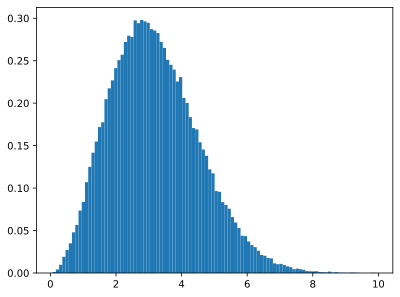

In [30]:
plt.hist(x_rho, 100, density=True)

(array([1.24947390e-03, 5.86291597e-03, 1.07646982e-02, 1.96071288e-02,
        2.69117454e-02, 3.74842169e-02, 4.91139354e-02, 6.14164476e-02,
        8.23691637e-02, 9.64978301e-02, 1.06685848e-01, 1.20526174e-01,
        1.45419539e-01, 1.67621729e-01, 1.80693148e-01, 1.93380114e-01,
        2.10680521e-01, 2.33267165e-01, 2.40187328e-01, 2.50759799e-01,
        2.64215672e-01, 2.68636887e-01, 2.79209359e-01, 2.87667336e-01,
        2.98720374e-01, 2.99200941e-01, 2.96701993e-01, 2.90550737e-01,
        2.96509767e-01, 2.83918914e-01, 2.79113246e-01, 2.69694135e-01,
        2.71039722e-01, 2.63062312e-01, 2.52297613e-01, 2.46530811e-01,
        2.26635342e-01, 2.15678417e-01, 2.11737769e-01, 2.00876957e-01,
        1.82711529e-01, 1.81750395e-01, 1.65122781e-01, 1.54069743e-01,
        1.39460509e-01, 1.26389090e-01, 1.16201072e-01, 1.12740991e-01,
        1.01687952e-01, 9.32299753e-02, 8.16002567e-02, 7.18928057e-02,
        6.49726426e-02, 5.82447062e-02, 5.54574183e-02, 5.122842

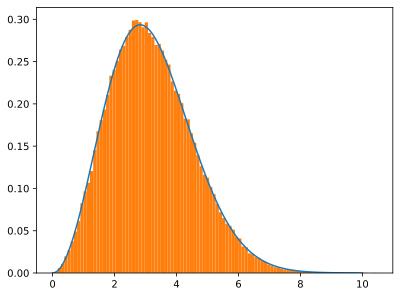

In [34]:
x_mb = sampler_ginator(a=0, b=20, N=100000, sample_from='uniform', Fmax=0.3)
velocities = np.linspace(0, 10, 1000)
plt.plot(velocities, [maxwell_boltzmann(a=2, v=vec) for vec in velocities])
plt.hist(x_mb, bins=100, density=True)

## Chapter 3. Estimate Errors

Alright. So far we've done lots of things. But we haven't stop for a moment and ask ourshelves: hmm okay what about the errors? In this chapter, we go back and analyze these errors associated with our method.

First, let us start off by revisiting the simplest case: estimating Pi. We rerun the algorithm 500 times, and reduce the sampling number to 1000.

In [35]:
all_the_pies = []
trials = 500

for i in range(trials):
    all_the_pies.append(pi_est(N0=1000, style='hm'))

all_the_pies = np.array(all_the_pies)
mean_pi = np.mean(all_the_pies)
mean_square_pi = np.mean(all_the_pies**2)
std = np.sqrt((mean_square_pi - mean_pi**2)/(trials-1))

A similar procedure can be repeated when one tries to analyze a MC program. 

## Chapter 4. Chain of radioactive decays

Alright. We've done one mother nucleus decays to one daughter nucleus. But that case borderlines boredom. How about the daughter nucleus continues to decay? That's interesting. Let us write down some equations to describe such process. They are called the Bateman equation. 

The reasons are as follow. If, at time $t$, there are $N_i(t)$ atoms of isotope $i$ that decays into isotope $i+1$ at the rate $\lambda_i$, the amounts of isotopes in the $k$-step decay chain evolves as 

\begin{align}
\dfrac{dN_1(t)}{dt} &= -\lambda_1 N_1(t)\\
\dfrac{dN_{i}(t)}{dt} &= -\lambda_i N_i(t) + \lambda_{i-1} N_{i-1}(t)\\
\dfrac{dN_k(t)}{dt} &= +\lambda_{k-1} N_{k-1}(t)
\end{align}

One can solve analytically for $k=2$ (meaning that we have three isotopes). But as $k$ increases, the problem becomes intractable. However, we can use a Monte-Carlo program to simulate such processes.

In [36]:
def three_nuclei_chain(N0: int, lambda_1, lambda_2, end_time):
    '''
        Simulating three nuclei chain decay
        
    '''
    
    nucleus_1 = [True for i in range(N0)]
    nucleus_2 = [False for i in range(N0)]
    nucleus_3 = [False for i in range(N0)]

    time_simulation = np.arange(1, end_time, 1)
    
    pop1 = np.zeros(len(time_simulation))
    pop2 = np.zeros(len(time_simulation))
    pop3 = np.zeros(len(time_simulation))

    for t in time_simulation:
        r1 = np.random.uniform(0, 1, N0)
        nucleus_1_decay = nucleus_1 & (r1 <= lambda_1)
        nucleus_1 = nucleus_1 & (r1 > lambda_1)

        r2 = np.random.uniform(0, 1, N0)
        nucleus_2_decay = nucleus_2 & (r2 <= lambda_2)
        nucleus_2 = (nucleus_2 & (r2 > lambda_2)) | nucleus_1_decay

        nucleus_3 = nucleus_3 | nucleus_2_decay

        pop1[t-1] = sum(nucleus_1)
        pop2[t-1] = sum(nucleus_2)
        pop3[t-1] = sum(nucleus_3)
        
    return time_simulation, pop1, pop2, pop3

In [37]:
lambda_1 = np.log(2)/14.8
lambda_2 = np.log(2)/16.1

time_simulation, pop1, pop2, pop3 = three_nuclei_chain(N0=10000, lambda_1=lambda_1, lambda_2=lambda_2, end_time=6*15)

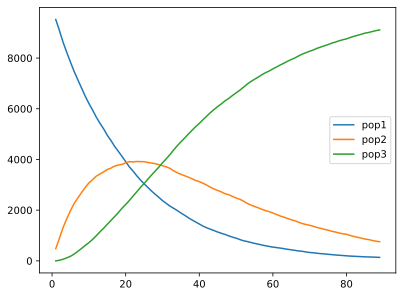

In [38]:
plt.plot(time_simulation, pop1, label='pop1')
plt.plot(time_simulation, pop2, label='pop2')
plt.plot(time_simulation, pop3, label='pop3')
plt.legend()

Here's one side task. In one hour, let us prove that the number of Kr nuclei decays obey the Poisson distribution. Let us simulation this event $20000$ times.

In [39]:
trials = 20000
lambda_Kr = np.log(2)/14.8
N0_Kr = 1000

N_Kr = [True for i in range(N0_Kr)]
decay_Kr = []

for trial in range(trials):
    r = np.random.uniform(0, 1, N0_Kr)
    r = (r <= lambda_Kr)
    decay_Kr.append(sum(r))

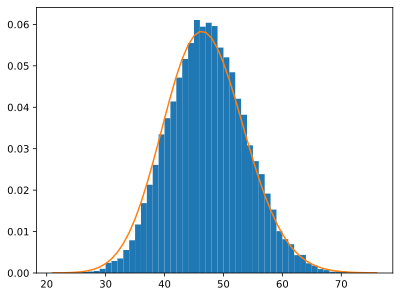

In [40]:
bins_Kr = np.arange(min(decay_Kr), max(decay_Kr), 1)
mu = N0_Kr*lambda_Kr
plt.hist(decay_Kr, bins_Kr,density=True)
plt.plot(bins_Kr, [np.exp(-mu)*mu**k/np.math.factorial(k) for k in bins_Kr])

Alright. So far so good. One last pretty hard example is switching between different branches of the decay chain. They are all stochastic processes each associated with a distinct probability of occuring. The idea is to assign them a probability. Let us try it out!

In [41]:
N0 = 10000

Rn211 = [True for i in range(N0)]
At211 = [False for i in range(N0)]
Po207 = [False for i in range(N0)]
Po211 = [False for i in range(N0)]
Bi207 = [False for i in range(N0)]
Pb207 = [False for i in range(N0)]

pRn_At = 0.74
lambda_Rn211 = np.log(2)/15
lambda_At211 = np.log(2)/7.2
lambda_Po207 = np.log(2)/5.7
lambda_Po211 = 0.99999
lambda_Bi207 = 0.00001

dt = 1 # 1 hour
tmax = 200 # 48 hour
time_simulation = np.arange(1, tmax, dt)

pop_Rn211 = np.zeros(len(time_simulation))
pop_At211 = np.zeros(len(time_simulation))
pop_Po207 = np.zeros(len(time_simulation))
pop_Po211 = np.zeros(len(time_simulation))
pop_Bi207 = np.zeros(len(time_simulation))
pop_Pb207 = np.zeros(len(time_simulation))

for t in time_simulation:

    r1 = np.random.uniform(0, 1, N0)
    Rn211_decay = Rn211 & (r1 <= lambda_Rn211)
    Rn211 = Rn211 & (r1 > lambda_Rn211)
    pop_Rn211[t-1] = sum(Rn211)
    
    p_Rn_At_at_t = np.random.uniform(0, 1)
    r2 = np.random.uniform(0, 1, N0)
    
    if p_Rn_At_at_t < pRn_At:
        At211_decay = At211 & (r2 <= lambda_At211)
        At211 = (At211 & (r2 > lambda_At211)) | Rn211_decay
        
        Po207_decay = Po207 & (r2 <= lambda_Po207)
        Po207 = (Po207 & (r2 > lambda_Po207))

    else: 
        At211_decay = At211 & (r2 <= lambda_At211)
        At211 = (At211 & (r2 > lambda_At211))
        
        Po207_decay = Po207 & (r2 <= lambda_Po207)
        Po207 = (Po207 & (r2 > lambda_Po207)) | Rn211_decay
        
    pop_At211[t-1] = sum(At211)
    pop_Po207[t-1] = sum(Po207)

    r3 = np.random.uniform(0, 1, N0)
    Po211_decay = Po211 & (r3 <= lambda_Po211)
    Po211 = (Po211 & (r3 > lambda_Po211)) | At211_decay
    pop_Po211[t-1] = sum(Po211)
    
    r4 = np.random.uniform(0, 1, N0)
    Bi207_decay = Bi207 & (r4 <= lambda_Bi207)
    Bi207 = (Bi207 & (r4 > lambda_Bi207)) | Po207_decay
    pop_Bi207[t-1] = sum(Bi207)

    Pb207 = Pb207 | Bi207_decay | Po211_decay
    pop_Pb207[t-1] = sum(Pb207)

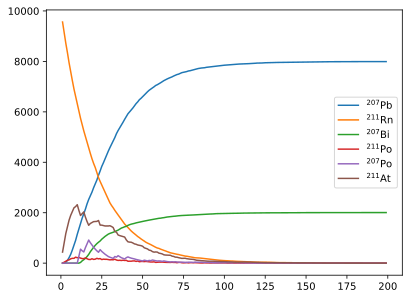

In [42]:
plt.plot(time_simulation, pop_Pb207, label=r'$^{207}$Pb')
plt.plot(time_simulation, pop_Rn211, label=r'$^{211}$Rn')
plt.plot(time_simulation, pop_Bi207, label=r'$^{207}$Bi')
plt.plot(time_simulation, pop_Po211, label=r'$^{211}$Po')
plt.plot(time_simulation, pop_Po207, label=r'$^{207}$Po')
plt.plot(time_simulation, pop_At211, label=r'$^{211}$At')
plt.legend()